<a href="https://colab.research.google.com/github/karanpk02/CodeClause_Churn_Prediction_in_Telecom_Industry/blob/main/codeclause_churn_prediction_in_telecom_industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split ##train and split
from sklearn.preprocessing import StandardScaler ## standrard scalig
from sklearn.linear_model import LogisticRegression #main code that build the LR model 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from imblearn.over_sampling import RandomOverSampler##for imbalanced data

In [ ]:
df_churn = pd.read_csv("https://raw.githubusercontent.com/karanpk02/CodeClause_Churn_Prediction_in_Telecom_Industry/0282013665be7d5547520df230d08db32dc17298/Data/churn_data.csv")
df_customer = pd.read_csv("https://raw.githubusercontent.com/karanpk02/CodeClause_Churn_Prediction_in_Telecom_Industry/0282013665be7d5547520df230d08db32dc17298/Data/customer_data.csv")
df_internet = pd.read_csv("https://raw.githubusercontent.com/karanpk02/CodeClause_Churn_Prediction_in_Telecom_Industry/0282013665be7d5547520df230d08db32dc17298/Data/internet_data.csv")

In [ ]:
df_churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_churn.shape

(7043, 9)

Here's what each column means in the churn table:
*******
* **customerID**: Unique identifier for each customer
* **tenure**: Number of months the customer has been with the company
* **PhoneService**: Whether or not the customer has a phone service (Yes/No)
* **Contract**: Type of contract the customer has (Month-to-month, One year, Two year)
* **PaperlessBilling**: Whether or not the customer has paperless billing (Yes/No)
* **PaymentMethod**: Payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges**: Amount charged to the customer per month
* **TotalCharges**: Total amount charged to the customer
* **Churn**: Whether or not the customer has churned (Yes/No)


In [ ]:
df_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [ ]:
df_customer.shape

(7043, 5)

The column names in the customer table for a churn prediction problem:
****
* **customerID**: It represents the unique identifier for each customer in the dataset.
* **gender**: It represents the gender of the customer.
* **SeniorCitizen**: It represents whether the customer is a senior citizen or not.
* **Partner**: It represents whether the customer has a partner or not.
* **Dependents**: It represents whether the customer has dependents or not.




In [ ]:
df_internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


These are the columns in the internet table of the churn prediction problem:
*******
* **customerID** - unique identifier for each customer
* **MultipleLines** - whether the customer has multiple phone lines
* **InternetService** - type of internet service the customer has (DSL, Fiber optic, or No)
* **OnlineSecurity** - whether the customer has online security add-on
* **OnlineBackup** - whether the customer has online backup add-on
* **DeviceProtection** - whether the customer has device protection add-on
* **TechSupport** - whether the customer has tech support add-on
* **StreamingTV** - whether the customer has streaming TV add-on
* **StreamingMovies** - whether the customer has streaming movie add-on


In [ ]:
df_internet.shape

(7043, 9)

###**Merging of 3 Dataframes with respect to customerID column**
*****

In [ ]:
merged_df = pd.merge(df_churn, df_customer, on='customerID')
merged_df = pd.merge(merged_df, df_internet, on='customerID')
df = merged_df[['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']]

In [ ]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,No,No phone service,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,Male,0,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,No,No,DSL,Yes,Yes,No,No,No,No,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,No,Fiber optic,No,No,No,No,No,No,Yes


In [ ]:
cols = list(df.columns)
print(len(cols))

21


In [ ]:
print(cols)

['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     7043 non-null   object 
 13  InternetService   7043 non-null   object 
 14  OnlineSecurity    7043 non-null   object 
 15  OnlineBackup      7043 non-null   object 
 16  DeviceProtection  7043 non-null   object 


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
print(df.dtypes)

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Churn                object
dtype: object


In [ ]:
print(df.isnull().sum())

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Churn                0
dtype: int64


In [ ]:
df = df.dropna(subset=['TotalCharges'])

In [ ]:
print(df['Churn'].value_counts())

No     5163
Yes    1869
Name: Churn, dtype: int64


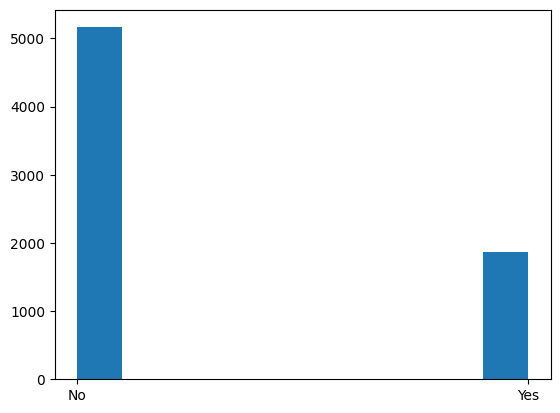

In [ ]:
plt.hist(df['Churn'])
plt.show()

**Clearly the data is imbalanced**.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00


The statistical measures for the numerical variables are as follows:
*******
* tenure: The mean is 32.37. The standard deviation is 24.56. The minimum value is 0 and the maximum value is 72.
* MonthlyCharges: The mean is 64.76 and standard deviation is 30.09. The minimum value is 18.25 and the maximum value is 118.75.
* TotalCharges: The mean is 2283.30 and standard deviation is 2266.77. The minimum value is 18.80 and the maximum value is 8684.80.

Senior citizen doesn't make any sense.

**More Detailed statistical values and measures**
*****

In [ ]:
# Compute the statistical measures for the numerical variables
num_vars = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
df_stats = pd.DataFrame(columns=['mean', 'median', 'mode', 'std', 'range'])
for col in num_vars:
    col_stats = [df[col].mean(), df[col].median(), df[col].mode().iloc[0], df[col].std(), df[col].max() - df[col].min()]
    df_stats.loc[col] = col_stats

# Print the statistical measures
print(df_stats)

                       mean    median   mode          std   range
tenure            32.421786    29.000   1.00    24.545260    71.0
MonthlyCharges    64.798208    70.350  20.05    30.085974   100.5
TotalCharges    2283.300441  1397.475  20.20  2266.771362  8666.0
SeniorCitizen      0.162400     0.000   0.00     0.368844     1.0


###**Understanding the categorical variables by computing their frequency distributions**
*****
First we find value count for one. Then we plot it for more understanding.

In [ ]:
cols_ = ['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'gender',
            'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# loop through each column and plot a countplot
for col in cols_:
  print(col)
  print("*****************")
  print("*****************")
  print(df[col].value_counts())
   

PhoneService
*****************
*****************
Yes    6352
No      680
Name: PhoneService, dtype: int64
Contract
*****************
*****************
Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64
PaperlessBilling
*****************
*****************
Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64
PaymentMethod
*****************
*****************
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64
gender
*****************
*****************
Male      3549
Female    3483
Name: gender, dtype: int64
Partner
*****************
*****************
No     3639
Yes    3393
Name: Partner, dtype: int64
Dependents
*****************
*****************
No     4933
Yes    2099
Name: Dependents, dtype: int64
MultipleLines
*****************
*****************
No                  3385
Yes                 2967
No phone service   

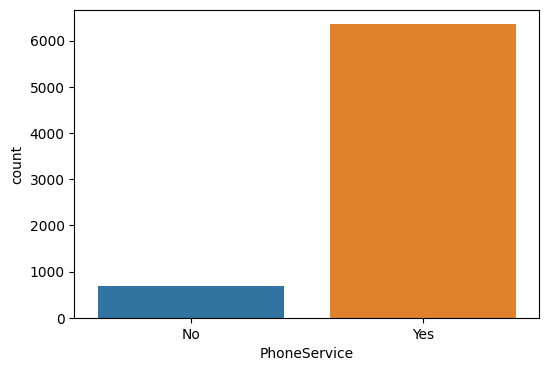

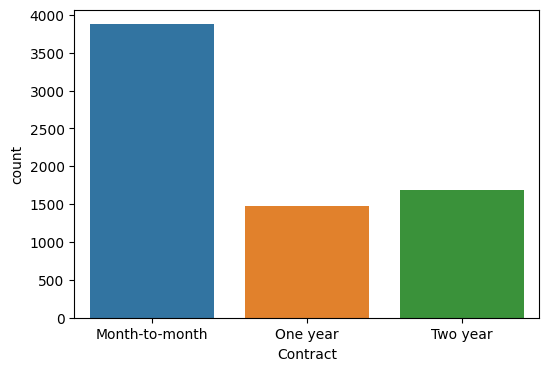

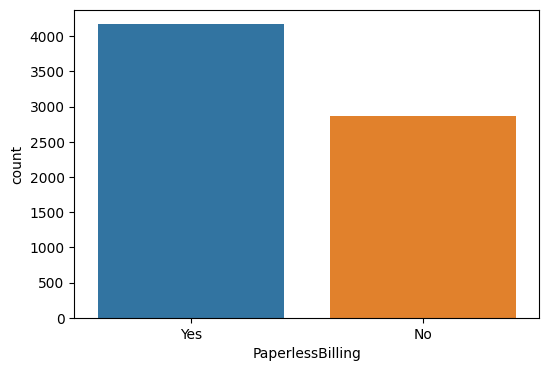

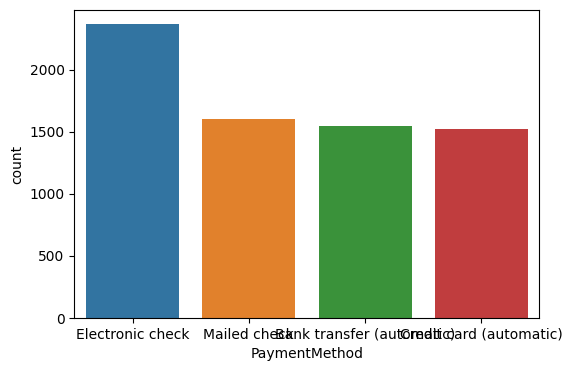

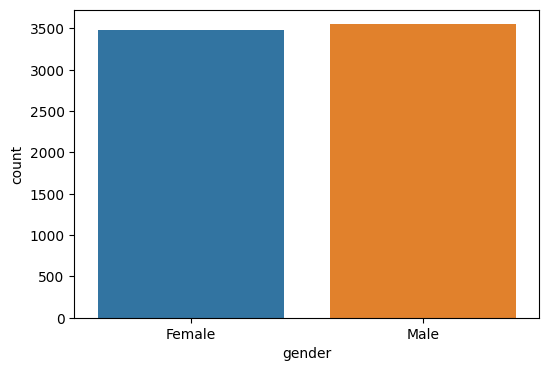

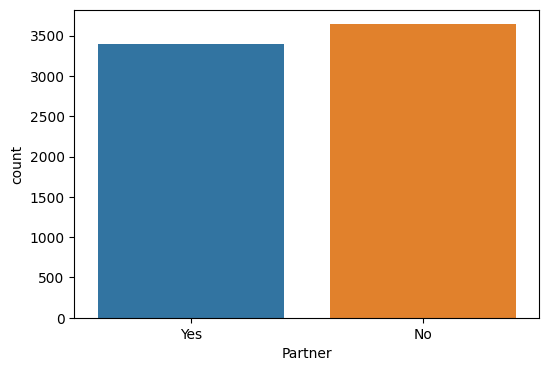

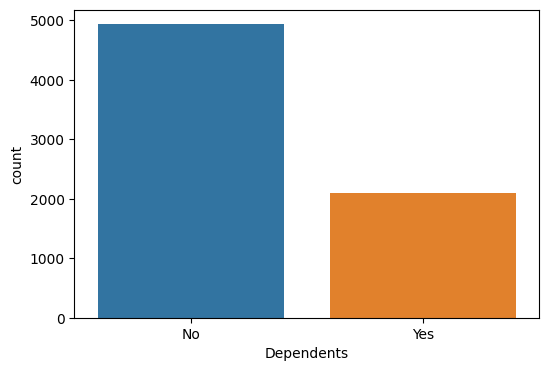

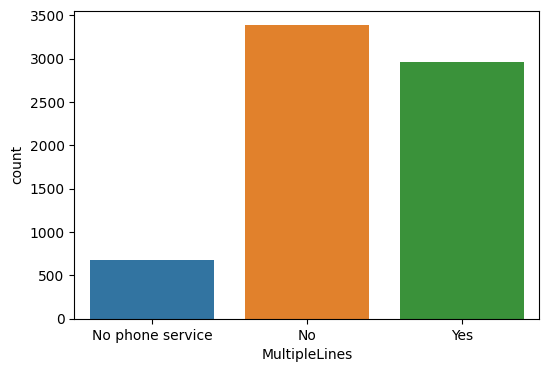

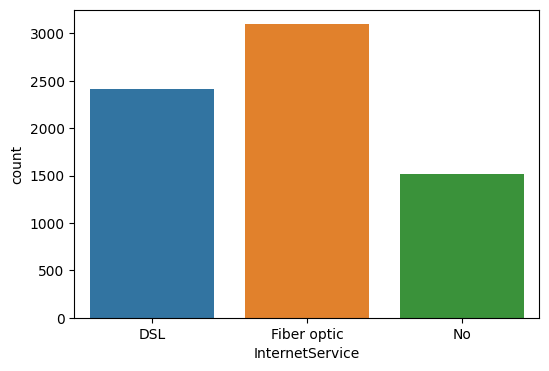

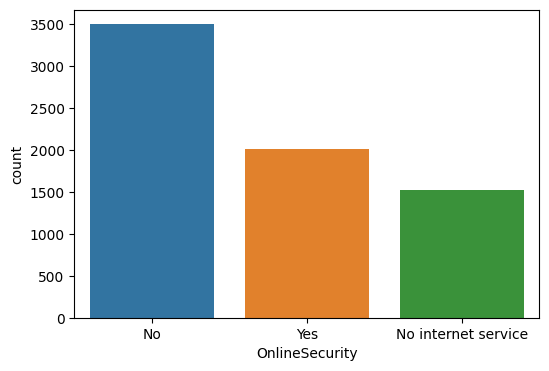

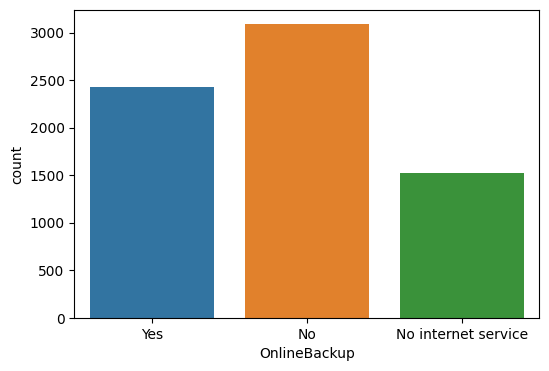

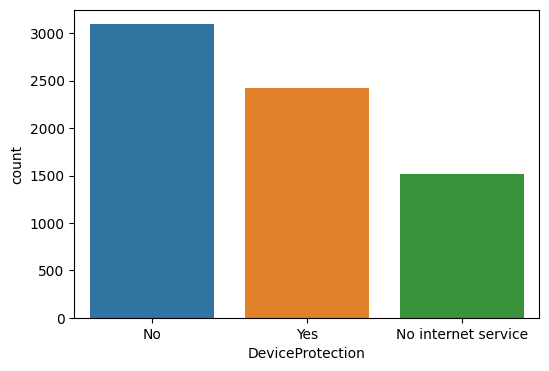

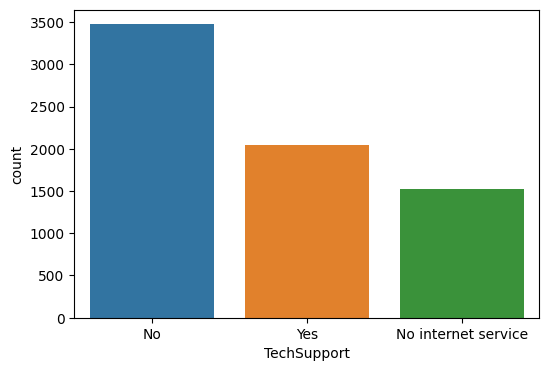

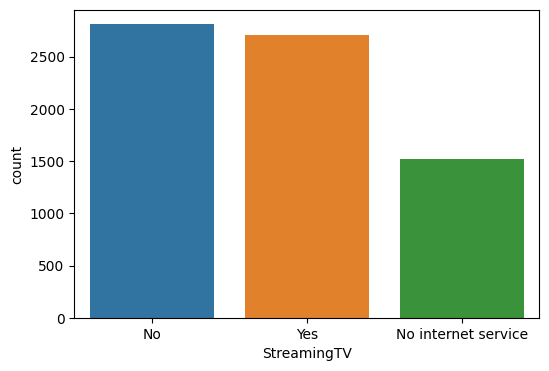

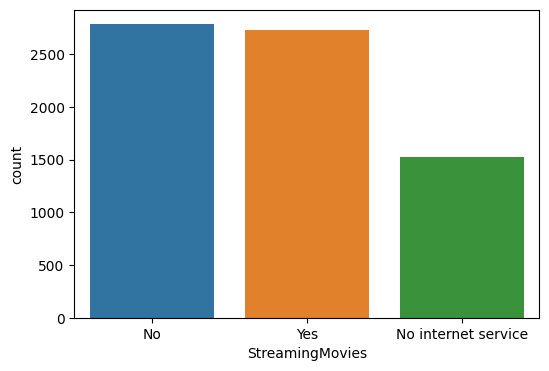

In [ ]:
cols_ = ['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'gender',
            'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# loop through each column and plot a countplot
for col in cols_:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.show()

###**From the graph, we can infer that:**
*****
*****

- Most customers have phone service (6352 Yes and 680 No).
- Most customers have a month-to-month contract (3875), followed by two-year (1685) and one-year (1472) contracts.
- More customers prefer paperless billing (4168 Yes and 2864 No).
- The most preferred payment method is electronic check (2365), followed by mailed check (1604), bank transfer (automatic) (1542), and credit card (automatic) (1521).
- The number of male and female customers is almost the same (3549 male and 3483 female).
- Most customers do not have a partner (3639 No and 3393 Yes).
- Most customers do not have dependents (4933 No and 2099 Yes).
- Most customers do not have multiple lines (3385 No, 2967 Yes, and 680 No phone service).
- Fiber optic is the most preferred internet service (3096), followed by DSL (2416) and no internet (1520).
- Most customers do not have online security (3497 No, 2015 Yes, and 1520 no internet service).
- Most customers do not have online backup (3087 No, 2425 Yes, and 1520 no internet service).
- Most customers do not have device protection (3094 No, 2418 Yes, and 1520 no internet service).
- Most customers do not have tech support (3472 No, 2040 Yes, and 1520 no internet service).
- Almost the same number of customers have and do not have streaming TV (2809 No, 2703 Yes, and 1520 no internet service).
- Almost the same number of customers have and do not have streaming movies (2781 No, 2731 Yes, and 1520 no internet service).

In [ ]:
df.shape

(7032, 21)

In [ ]:
df1=df.copy()

###**Count of Tenure for each interval length of 10 months from 0 to 80 months(Here minimum and maximum tenure are 1 and 72 respectively)**
******
*****

(0, 10]     1959
(10, 20]     908
(20, 30]     763
(30, 40]     645
(40, 50]     652
(50, 60]     698
(60, 70]     875
(70, 80]     532
Name: tenure_bins, dtype: int64


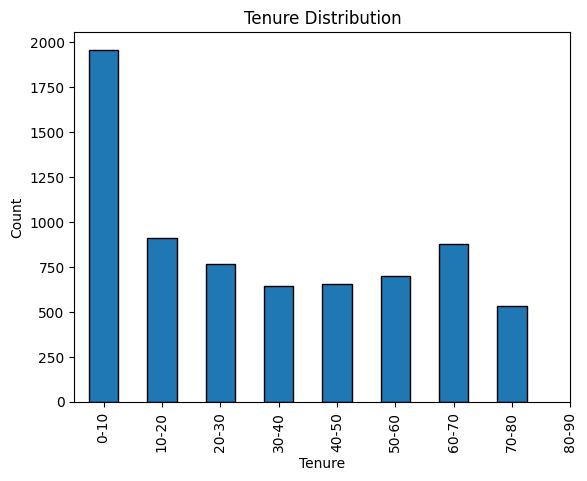

In [ ]:
# Define the bin edges
bins = [i for i in range(0, 90, 10)]
# Cut the MonthlyCharges column into bins
df1['tenure_bins'] = pd.cut(df1['tenure'], bins)
# Count the number of observations in each bin
counts = df1['tenure_bins'].value_counts(sort=False)
# Plot the histogram
counts.plot(kind='bar', edgecolor='black')
print(counts)
# Set the x-axis labels
labels = [f"{i}-{i+10}" for i in range(0, 90, 10)]
plt.xticks(range(len(labels)), labels)
# Set the plot title and axis labels
plt.title("Tenure Distribution")
plt.xlabel("Tenure")
plt.ylabel("Count")
# Show the plot
plt.show()

The graph shows the count of customers falling in each interval of 10 months of tenure. From the output, we can infer that:
*******************
*******************
- The majority of customers have a tenure of less than 10 months, as 1959 customers fall in the (0, 10] interval.
- As the tenure increases, the number of customers in each interval decreases, indicating that there are fewer customers who stay with the company for a longer period.
- There is a relatively larger number of customers in the (60, 70] interval compared to other intervals, which could mean that the company has some kind of incentive or loyalty program for customers who have been with them for a longer period.
- The total count of customers in all the intervals is 6522, which is the same as the total count of customers in the original dataframe, indicating that no data has been lost during the process of creating the intervals.

###**Count of Monthly Charges for each interval length of amount 20 in between 0 to 80 charges(Here minimum and maximum are 1 and 72 respectively)**
*******
******

(0, 20]        653
(20, 40]      1179
(40, 60]      1078
(60, 80]      1457
(80, 100]     1763
(100, 120]     902
Name: MonthlyCharges_bins, dtype: int64


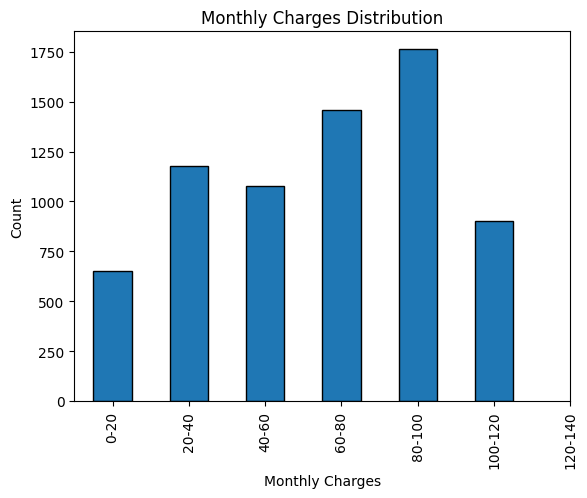

In [ ]:
# Define the bin edges
bins = [i for i in range(0, 140, 20)]
# Cut the MonthlyCharges column into bins
df1['MonthlyCharges_bins'] = pd.cut(df1['MonthlyCharges'], bins)
# Count the number of observations in each bin
counts = df1['MonthlyCharges_bins'].value_counts(sort=False)
# Plot the histogram
counts.plot(kind='bar', edgecolor='black')
print(counts)
# Set the x-axis labels
labels = [f"{i}-{i+20}" for i in range(0, 140, 20)]
plt.xticks(range(len(labels)), labels)
# Set the plot title and axis labels
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
# Show the plot
plt.show()

That is; there are 653 customers who pay a monthly charge between 0 and 20, 1179 customers who pay a monthly charge between 20 and 40, and so on. The given graph shows the count of Monthly Charges for each interval length of amount 20 in between 0 to 80 charges. Here are some inferences we can draw from the data:

* The majority of customers have a Monthly Charge between 20 and 100.
* The highest number of customers have a Monthly Charge between 80 and 100.
* The number of customers decreases as the Monthly Charge increases beyond 100.
* The lowest number of customers have a Monthly Charge between 0 and 20.

###**Count of Total Charges for each interval length of amount 1000 in between 0 to 10,000 charges(Here minimum and maximum are 18.80 and 3794.73 respectively)**

(0, 1000]       2893
(1000, 2000]    1283
(2000, 3000]     652
(3000, 4000]     556
(4000, 5000]     513
(5000, 6000]     443
(6000, 7000]     365
(7000, 8000]     249
(8000, 9000]      78
Name: TotalCharges_bins, dtype: int64


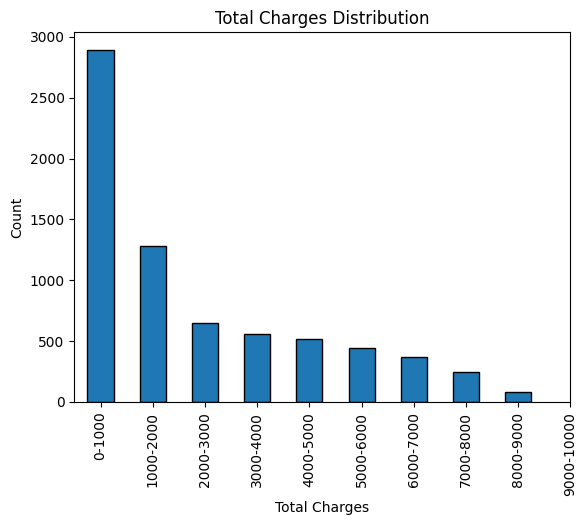

In [ ]:
# Define the bin edges
bins = [i for i in range(0, 10000, 1000)]
# Cut the MonthlyCharges column into bins
df1['TotalCharges_bins'] = pd.cut(df1['TotalCharges'], bins)
# Count the number of observations in each bin
counts = df1['TotalCharges_bins'].value_counts(sort=False)
# Plot the histogram
counts.plot(kind='bar', edgecolor='black')
print(counts)
# Set the x-axis labels
labels = [f"{i}-{i+1000}" for i in range(0, 10000, 1000)]
plt.xticks(range(len(labels)), labels)
# Set the plot title and axis labels
plt.title("Total Charges Distribution")
plt.xlabel("Total Charges")
plt.ylabel("Count")
# Show the plot
plt.show()

Based on the given output, we can infer that:
******
******
- The majority of customers have a total charge in the range of 0 to 1000.
- As the total charge amount increases, the count of customers gradually decreases.
- There are very few customers with a total charge amount greater than 8000.
- The minimum and maximum total charges are 18.80 and 3794.73 respectively.
- The bins used for categorizing the total charges are of length 1000, starting from 0 and ending at 9000.

##**Encoding**
*******
*******
- For binary values we do label encoding.
- For other varible we do nominal/ordinal encoding.

In [ ]:
df = pd.get_dummies(df, columns = ['Contract','PaymentMethod','InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies'])

In [ ]:
cols_ = ['PhoneService', 'PaperlessBilling', 'Partner', 'Dependents','Churn']
for col in cols_:
  df[col] = df[col].replace({"Yes": 1, "No": 0})

In [ ]:
cols_ = ['gender']
for col in cols_:
  df[col] = df[col].replace({"Male": 1, "Female": 0})

###**Dropping CustomerID**
******

In [ ]:
df = df.drop('customerID', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   PhoneService                             7032 non-null   int64  
 2   PaperlessBilling                         7032 non-null   int64  
 3   MonthlyCharges                           7032 non-null   float64
 4   TotalCharges                             7032 non-null   float64
 5   gender                                   7032 non-null   int64  
 6   SeniorCitizen                            7032 non-null   int64  
 7   Partner                                  7032 non-null   int64  
 8   Dependents                               7032 non-null   int64  
 9   Churn                                    7032 non-null   int64  
 10  Contract_Month-to-month                  7032 no

In [ ]:
cols = list(df.columns)
print(cols)

['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes']


##**Correlation Matrix**
*****
*****
Correlation matrix only gives information about the linear relationship between variables. It measures how much two variables are related in a linear way. It cannot detect non-linear relationships or relationships that are not monotonic. Therefore, it is always important to examine the data visually and not rely solely on correlation matrix to draw conclusions.


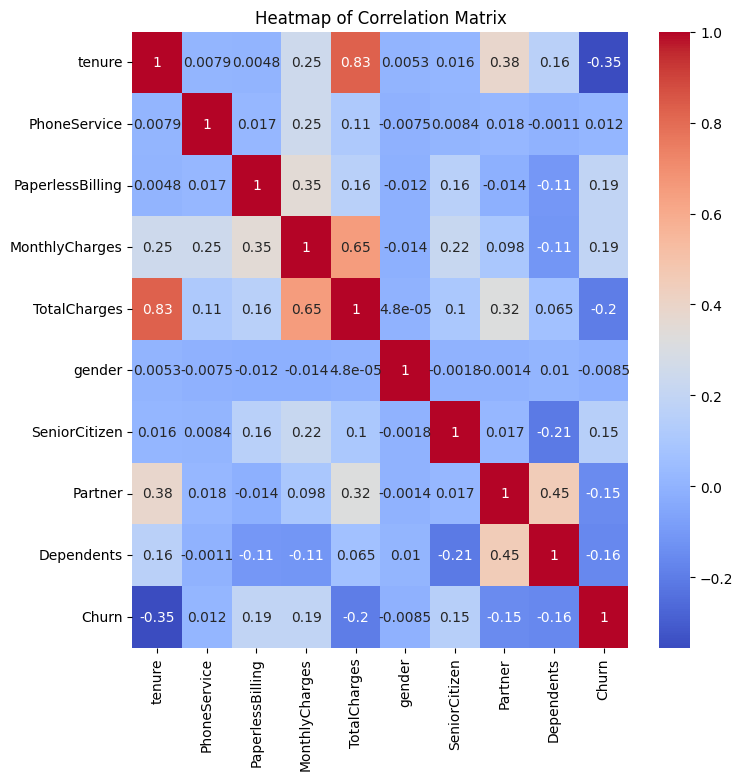

In [ ]:
# Selecting the required columns for the heatmap
cols = ['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen',
 'Partner', 'Dependents', 'Churn']
# Creating a correlation matrix
corr = df[cols].corr()
plt.figure(figsize=(8, 8))
# Creating a heatmap using Seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

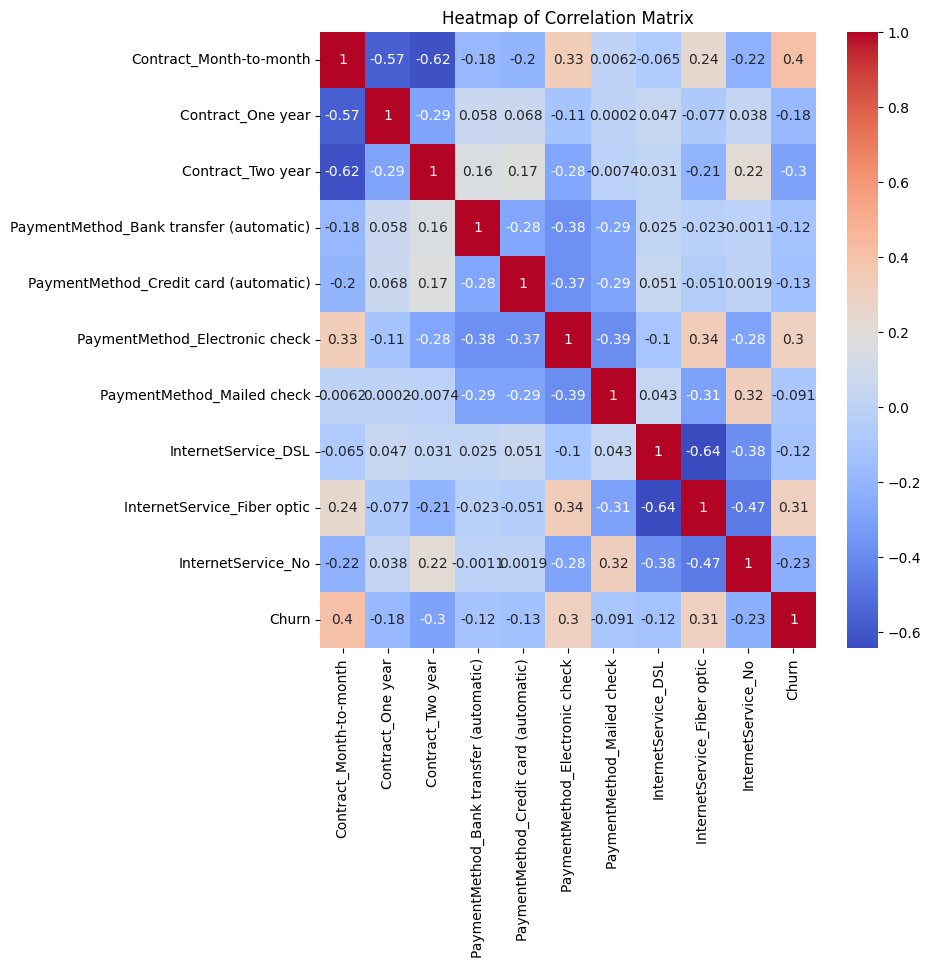

In [ ]:
cols = ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
        'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 
        'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Churn']
# Creating a correlation matrix
corr = df[cols].corr()
plt.figure(figsize=(8, 8))
# Creating a heatmap using Seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

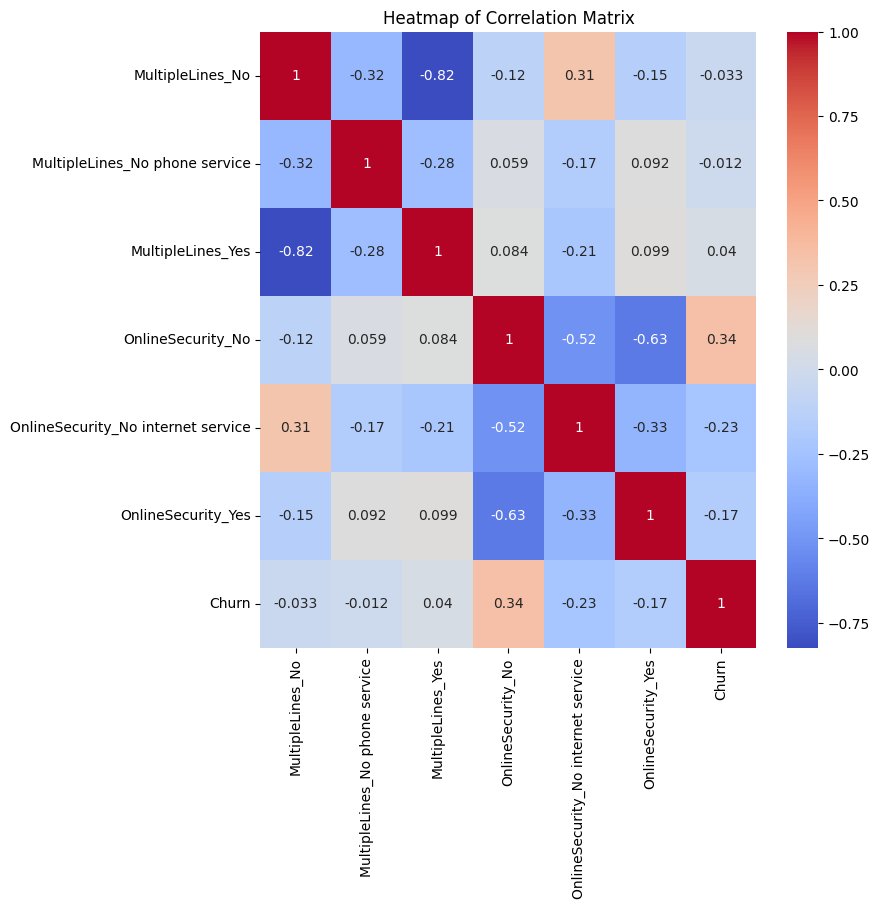

In [ ]:
cols = [ 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'OnlineSecurity_No',
        'OnlineSecurity_No internet service', 'OnlineSecurity_Yes','Churn']
# Creating a correlation matrix
corr = df[cols].corr()
plt.figure(figsize=(8, 8))
# Creating a heatmap using Seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

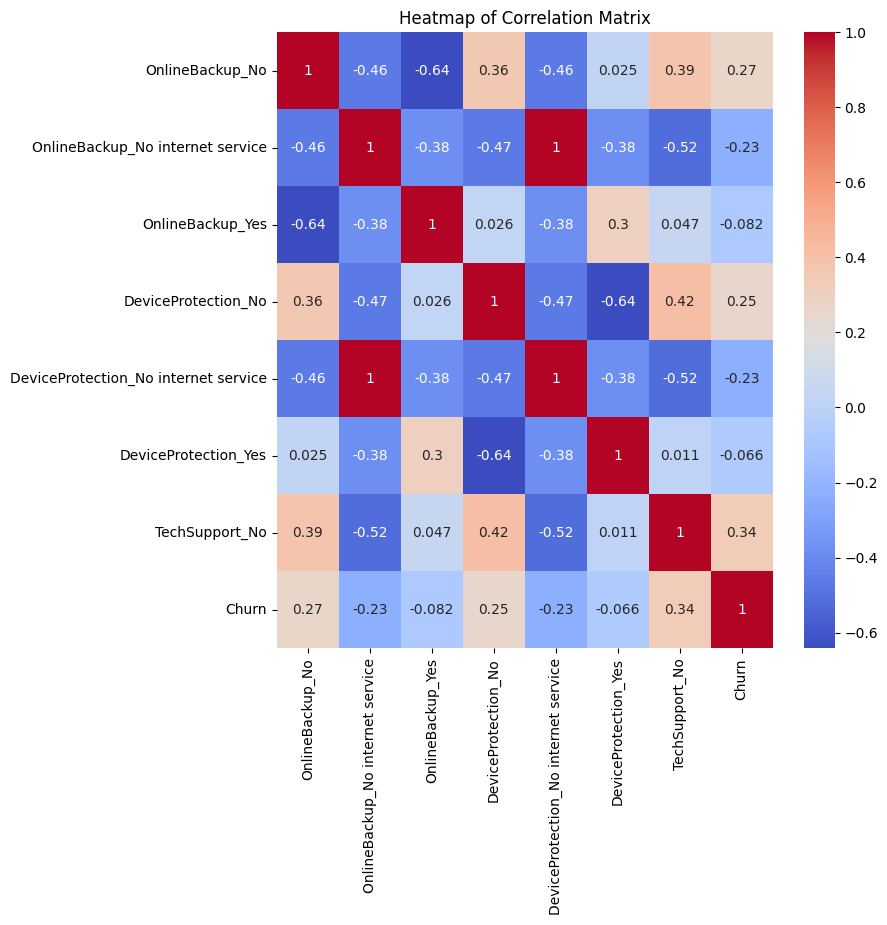

In [ ]:
cols = [ 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 
        'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'Churn']
# Creating a correlation matrix
corr = df[cols].corr()
plt.figure(figsize=(8,8))
# Creating a heatmap using Seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

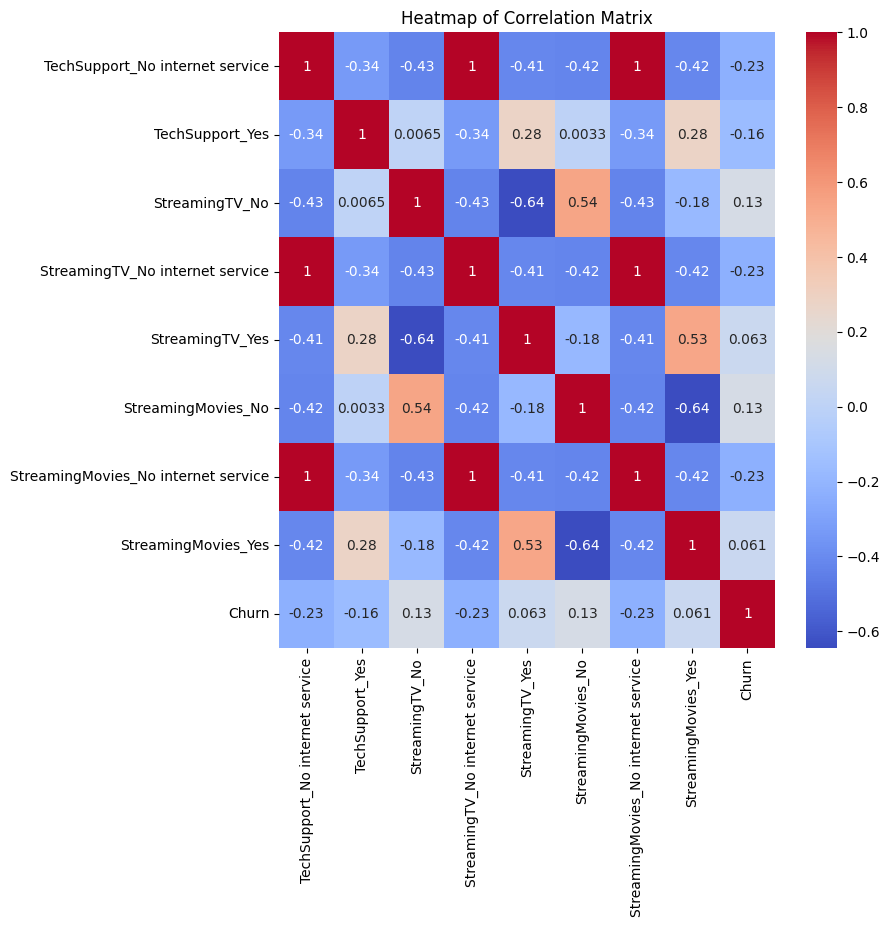

In [ ]:
cols = [ 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 
        'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes','Churn']
# Creating a correlation matrix
corr = df[cols].corr()
plt.figure(figsize=(8,8))
# Creating a heatmap using Seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [ ]:
# Split the data into features and target
X = df.drop('Churn', axis=1).values
y = df['Churn'].values

In [ ]:
# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Fit and transform the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

**Feature Scaling**

In [ ]:
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

###**logistic Regression**
*****
******

In [ ]:
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(X_train_scaled,y_train) #magic happens - best values of betas - training/learning happens here
y_pred=logistic_regression.predict(X_test_scaled)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
logistic_regression.coef_

array([[-1.30615613,  0.02914489,  0.15412921, -0.88953843,  0.59253693,
        -0.00986216,  0.10795553,  0.00485556, -0.09714547,  0.26666823,
        -0.02468905, -0.31220744, -0.0341843 , -0.05980791,  0.1138667 ,
        -0.04785821, -0.33619224,  0.39503481, -0.11099301, -0.1079426 ,
        -0.02914489,  0.12611661,  0.08683328, -0.11099301, -0.00354373,
         0.04601148, -0.11099301,  0.03894811,  0.0267051 , -0.11099301,
         0.05976859,  0.0901051 , -0.11099301, -0.0073334 , -0.06677411,
        -0.11099301,  0.15213458, -0.09222223, -0.11099301,  0.17746682]])

In [ ]:
logistic_regression.intercept_

array([-0.20812094])

**Step 3 | Predection**

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,0,0
1,1,0
2,0,1
3,0,0
4,0,0
...,...,...
2061,0,1
2062,1,0
2063,1,0
2064,0,1


**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[762, 244],
       [197, 863]])

**Visualization**

<Axes: xlabel='Predicted', ylabel='Actual'>

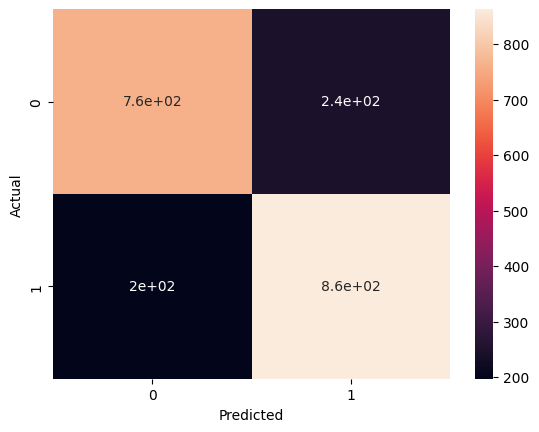

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
# Evaluate the model using common metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.7865440464666021
Precision: 0.7795844625112918
Recall: 0.8141509433962264
F1 Score: 0.7964928472542686
ROC AUC Score: 0.7858031058929442


###**Overall inference from accuracy**
*****
*****
Overall, these results suggest that the logistic regression model is performing reasonably well in predicting churn and could be used to identify customers who are at risk of churning. However, further analysis and evaluation may be necessary to determine the optimal threshold for predicting churn and to identify other factors that could be affecting customer churn.